<a href="https://colab.research.google.com/github/brunogtds/datavisualization_Python/blob/main/distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*sobre distribuição*

In [ ]:
##distribuição -> geralmente histogramas e boxplots são boas opções

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd

%matplotlib inline 

In [2]:
flights = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/flights_delays_2015.csv')
flights.head()

,arr_delay,name
0,11.0,United Air Lines Inc.
1,20.0,United Air Lines Inc.
2,12.0,United Air Lines Inc.
3,7.0,United Air Lines Inc.
4,-14.0,United Air Lines Inc.


(array([  3460.,  36175., 142393., 223715., 257317., 273308., 282821.,
        289167., 293660., 297001.]),
 array([-60., -42., -24.,  -6.,  12.,  30.,  48.,  66.,  84., 102., 120.]),
 <BarContainer object of 10 artists>)

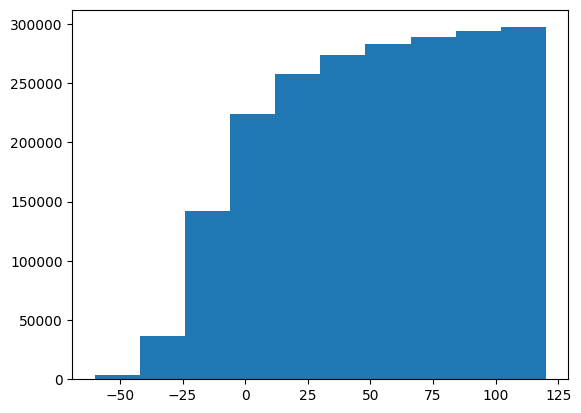

In [3]:
plt.hist(flights['arr_delay'],cumulative='True')

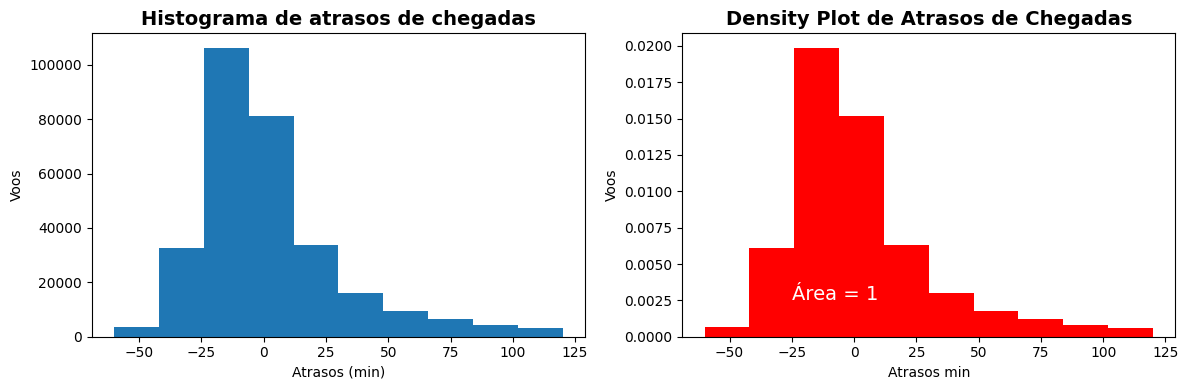

In [4]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(flights['arr_delay'])
plt.title('Histograma de atrasos de chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Voos')

plt.subplot(1,2,2)
plt.hist(flights['arr_delay'], density='True', color='red')

plt.title('Density Plot de Atrasos de Chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos min')
plt.ylabel('Voos')
plt.text(-25,0.0025,'Área = 1', c='white', fontsize=14)

plt.tight_layout()
plt.show()

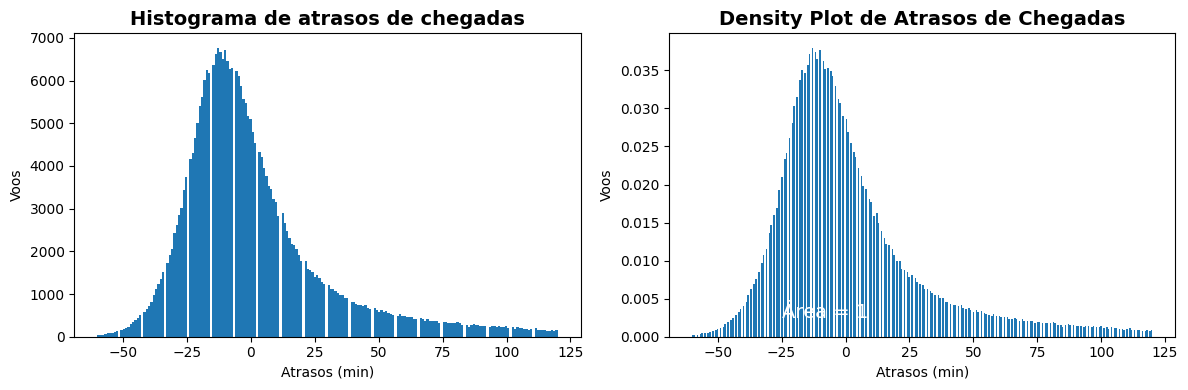

In [5]:
# plt.title('Histograma de atrasos de chegadas', fontsize=14, weight='bold')
# plt.xlabel('Atrasos (min)')
# plt.ylabel('Voos')

# plt.subplot(1,2,2)
# plt.hist(flights['arr_delay'], density='True')

# plt.title('Density Plot de Atrasos de Chegadas', fontsize=14, weight='bold')
# plt.xlabel('Atrasos min')
# plt.ylabel('Voos')
# plt.text(-25,0.0025,'Área = 1', c='white', fontsize=14)

# plt.tight_layout()
# plt.show()

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(flights['arr_delay'],bins=200)

plt.title('Histograma de atrasos de chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Voos')

plt.subplot(1,2,2)
plt.hist(flights['arr_delay'], density='True', bins=300)

plt.title('Density Plot de Atrasos de Chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Voos')
plt.text(-25,0.0025,'Área = 1', c='white', fontsize=14)

plt.tight_layout()
plt.show()

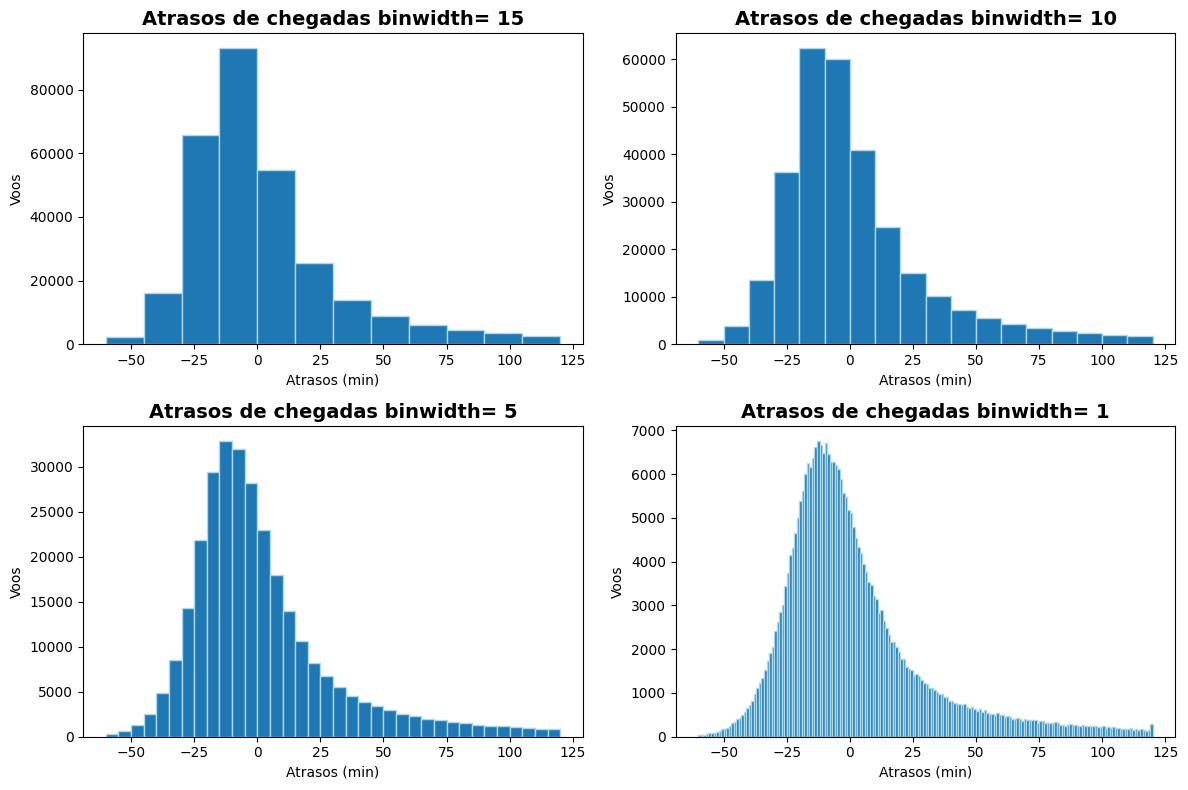

In [6]:
plt.figure(figsize=(12,8))

for i, binwidth in enumerate([15,10,5,1]):
  plt.subplot(2,2,i+1)

  interval = flights['arr_delay'].max() - flights['arr_delay'].min()
  plt.hist(flights['arr_delay'], bins=int(interval/binwidth), edgecolor = 'lightblue')
  plt.title('Atrasos de chegadas binwidth= %d' %binwidth, fontsize=14, weight='bold')
  plt.xlabel('Atrasos (min)')
  plt.ylabel('Voos')

plt.tight_layout()
plt.show()


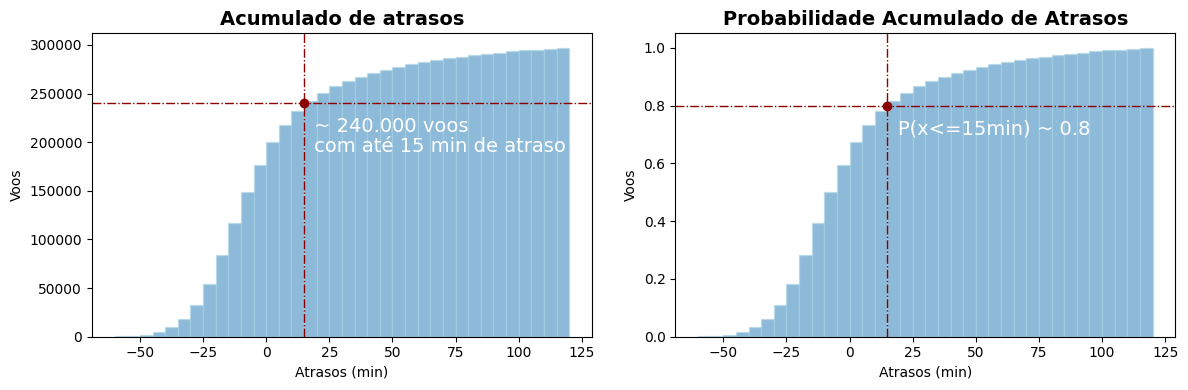

In [7]:
plt.figure(figsize=(12,4))

binwidth=5

plt.subplot(1,2,1)
plt.hist(flights['arr_delay'],bins=int(interval/binwidth),edgecolor='lightblue',cumulative=True,alpha=0.5)

plt.axvline(15,linewidth=1,linestyle='-.',color='darkred')
plt.axhline(240000, linewidth=1, linestyle='-.', color='darkred')
plt.plot(15,240000,'o',color='darkred')
plt.text(19,210000, '~ 240.000 voos', fontsize=14, color='w')
plt.text(19,190000, 'com até 15 min de atraso', fontsize=14, color='w')

plt.title('Acumulado de atrasos', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Voos')

plt.subplot(1,2,2)
plt.hist(flights['arr_delay'],density='True',bins=int(interval/binwidth),edgecolor='lightblue',cumulative=True,alpha=0.5)

plt.title('Probabilidade Acumulado de Atrasos', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Voos')

plt.axvline(15, linewidth=1, linestyle= '-.', color='darkred')
plt.axhline(0.8, linewidth=1, linestyle='-.', color='darkred')
plt.plot(15,0.8,'o',color='darkred')
plt.text(19,0.7,'P(x<=15min) ~ 0.8', fontsize=14,color='w')

plt.tight_layout()
plt.show()

<ipython-input-8-41aab6774e5b>:3: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density= kde.gaussian_kde(flights['arr_delay']) #KDE -> kernel density estimation, para estimar a função de densidade de probabilidade de uma variável


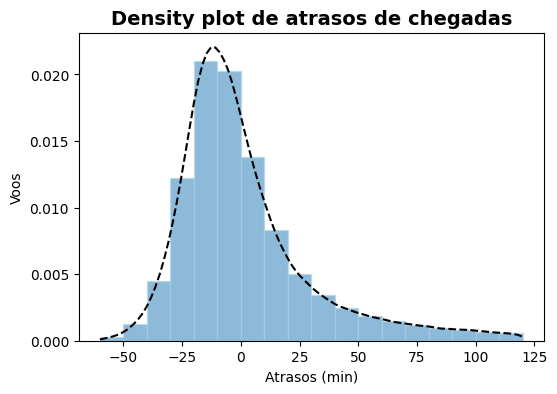

In [8]:
from scipy.stats import kde

density= kde.gaussian_kde(flights['arr_delay']) #KDE -> kernel density estimation, para estimar a função de densidade de probabilidade de uma variável
x= np.linspace(-60,120,100)
y= density(x)

plt.figure(figsize=(6,4))
binwidth=10

plt.hist(flights['arr_delay'],density='True',bins=int(interval/binwidth),edgecolor='lightblue',alpha=0.5)
plt.plot(x,y,'--k')

plt.title('Density plot de atrasos de chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Voos')

plt.show()

In [9]:
x= np.linspace(-60,120,100) #arange allow you to define the size of the step. linspace allow you to define the number of steps.
x

array([-60.        , -58.18181818, -56.36363636, -54.54545455,
       -52.72727273, -50.90909091, -49.09090909, -47.27272727,
       -45.45454545, -43.63636364, -41.81818182, -40.        ,
       -38.18181818, -36.36363636, -34.54545455, -32.72727273,
       -30.90909091, -29.09090909, -27.27272727, -25.45454545,
       -23.63636364, -21.81818182, -20.        , -18.18181818,
       -16.36363636, -14.54545455, -12.72727273, -10.90909091,
        -9.09090909,  -7.27272727,  -5.45454545,  -3.63636364,
        -1.81818182,   0.        ,   1.81818182,   3.63636364,
         5.45454545,   7.27272727,   9.09090909,  10.90909091,
        12.72727273,  14.54545455,  16.36363636,  18.18181818,
        20.        ,  21.81818182,  23.63636364,  25.45454545,
        27.27272727,  29.09090909,  30.90909091,  32.72727273,
        34.54545455,  36.36363636,  38.18181818,  40.        ,
        41.81818182,  43.63636364,  45.45454545,  47.27272727,
        49.09090909,  50.90909091,  52.72727273,  54.54

<ipython-input-10-0678ac2b508e>:3: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density= kde.gaussian_kde(flights[flights['arr_delay'] > 0]['arr_delay'])


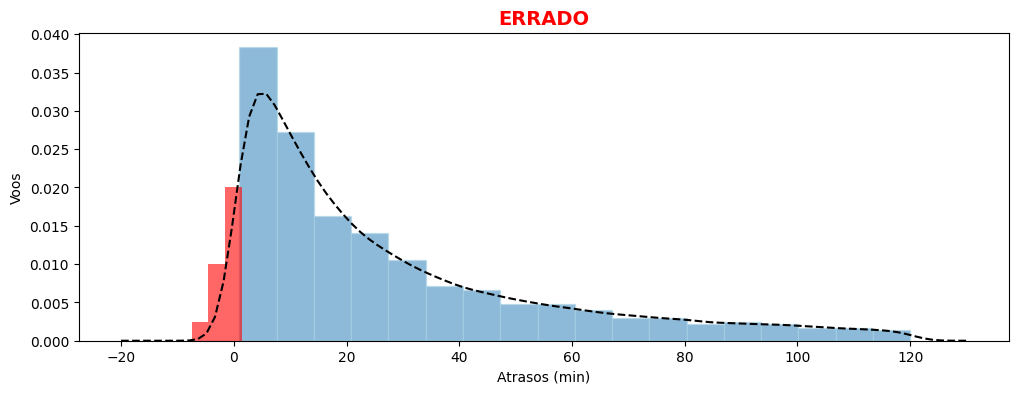

In [10]:
from scipy.stats import kde

density= kde.gaussian_kde(flights[flights['arr_delay'] > 0]['arr_delay'])
x= np.linspace(-20,130,100)
y= density(x)

plt.figure(figsize=(12,4))

binwidth=10

plt.hist(flights[flights['arr_delay'] > 0]['arr_delay'],density='True',bins=int(interval/binwidth),edgecolor='lightblue',alpha=0.5)
plt.plot(x,y,'--k')

plt.title('ERRADO', fontsize=14, weight='bold', color='r')
plt.xlabel('Atrasos (min)')
plt.ylabel('Voos')

plt.bar(0,0.02,color='red',width=3,alpha=0.6)
plt.bar(-3,0.01,color='red',width=3,alpha=0.6)
plt.bar(-6,0.0025,color='red',width=3,alpha=0.6)

plt.show()


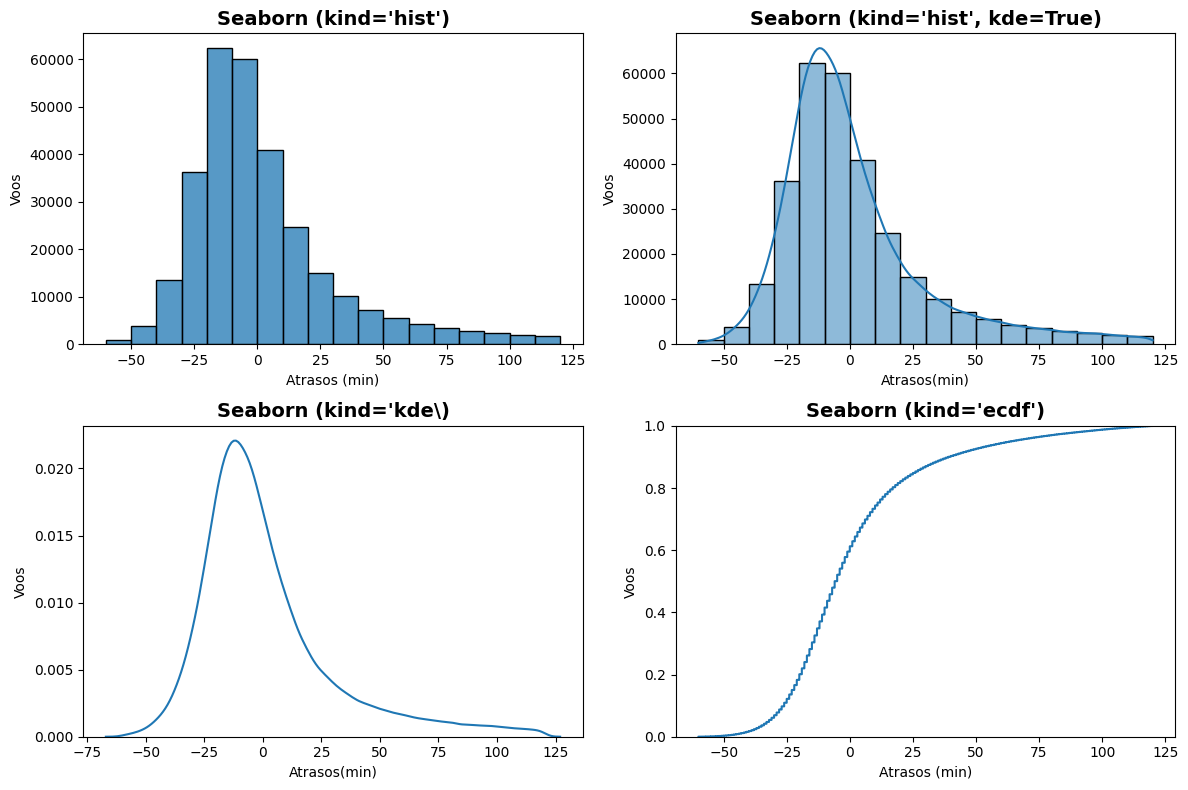

In [11]:
#usando seaborn

plt.figure(figsize=(12,8))
binwidth=10

plt.subplot(2,2,1)
sns.histplot(data=flights, x='arr_delay', bins=int(interval/binwidth))
plt.title('Seaborn (kind=\'hist\')', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Voos')

plt.subplot(2,2,2)
sns.histplot(data=flights, x='arr_delay', bins=int(interval/binwidth),kde=True)

plt.title('Seaborn (kind=\'hist\', kde=True)', fontsize=14, weight='bold')
plt.xlabel('Atrasos(min)')
plt.ylabel('Voos')

plt.subplot(2,2,3)
sns.kdeplot(data=flights, x='arr_delay')
plt.title('Seaborn (kind=\'kde\)', fontsize=14, weight='bold')
plt.xlabel('Atrasos(min)')
plt.ylabel('Voos')

plt.subplot(2,2,4)
sns.ecdfplot(data=flights, x='arr_delay')
plt.title('Seaborn (kind=\'ecdf\')', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Voos')

plt.tight_layout()
plt.show()

top 3 Index(['United Air Lines Inc.', 'JetBlue Airways',
       'Atlantic Southeast Airlines'],
      dtype='object', name='name')
bottom 3 Index(['Frontier Airlines Inc.', 'Hawaiian Airlines Inc.',
       'Skywest Airlines Inc.'],
      dtype='object', name='name')


<ipython-input-12-0eaef7346f84>:25: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = kde.gaussian_kde(serie)
<ipython-input-12-0eaef7346f84>:56: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = kde.gaussian_kde(serie)


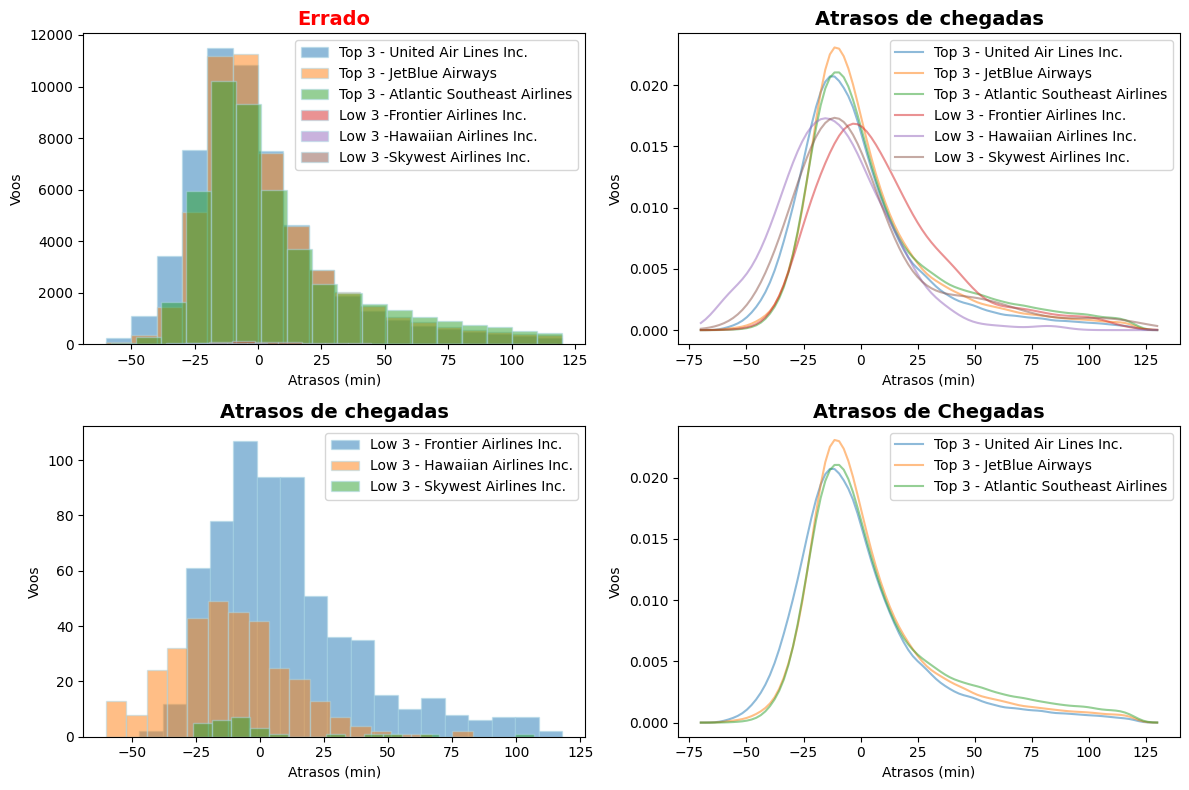

In [12]:
plt.figure(figsize=(12,8))
companhias = pd.Series(flights.groupby('name')['name'].count())
companhias = companhias.sort_values(ascending=False)
top3 = companhias.index[:3]
low3 = companhias.index[-3:]

print('top 3', top3)
print('bottom 3', low3)

binwidth=10

plt.subplot(2,2,1)
for companhia in top3:
  plt.hist(flights[flights.name == companhia]['arr_delay'],bins=int(interval/binwidth), edgecolor='lightblue', alpha=0.5, label='Top 3 - ' + companhia)

for companhia in low3:
  plt.hist(flights[flights.name == companhia]['arr_delay'],bins=int(interval/binwidth), edgecolor='lightblue', alpha=0.5, label='Low 3 -' + companhia)

plt.title('Errado', fontsize=14, weight='bold', color='r')
plt.xlabel('Atrasos (min)')
plt.ylabel('Voos')
plt.legend()

def density(serie, xmin=0, xmax=100, intervals=100):
  density = kde.gaussian_kde(serie)
  x = np.linspace(xmin,xmax,100)
  y = density(x)
  return x, y

plt.subplot(2,2,2)

for companhia in top3:
  x, y= density(flights[flights.name == companhia]['arr_delay'],-70,130)
  plt.plot(x,y,alpha=0.5,label='Top 3 - ' + companhia)
 
for companhia in low3:
  x, y= density(flights[flights.name == companhia]['arr_delay'],-70,130)
  plt.plot(x,y,alpha=0.5,label='Low 3 - ' + companhia)

plt.title('Atrasos de chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Voos')
plt.legend()

plt.subplot(2,2,3)

for companhia in low3:
  plt.hist(flights[flights.name == companhia]['arr_delay'],bins=int(interval/binwidth),edgecolor='lightblue',alpha=0.5,label='Low 3 - ' + companhia)

plt.title('Atrasos de chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Voos')
plt.legend()

def density (serie, xmin=0, xmax=100, intervals=100):
  density = kde.gaussian_kde(serie)
  x = np.linspace(xmin, xmax, 100)
  y = density(x)
  return x, y

plt.subplot(2,2,4)
for companhia in top3:
  x,y = density(flights[flights.name == companhia]['arr_delay'],-70,130)
  plt.plot(x,y,alpha=0.5,label='Top 3 - ' + companhia)

plt.title('Atrasos de Chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Voos')
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
flights.head()

,arr_delay,name
0,11.0,United Air Lines Inc.
1,20.0,United Air Lines Inc.
2,12.0,United Air Lines Inc.
3,7.0,United Air Lines Inc.
4,-14.0,United Air Lines Inc.


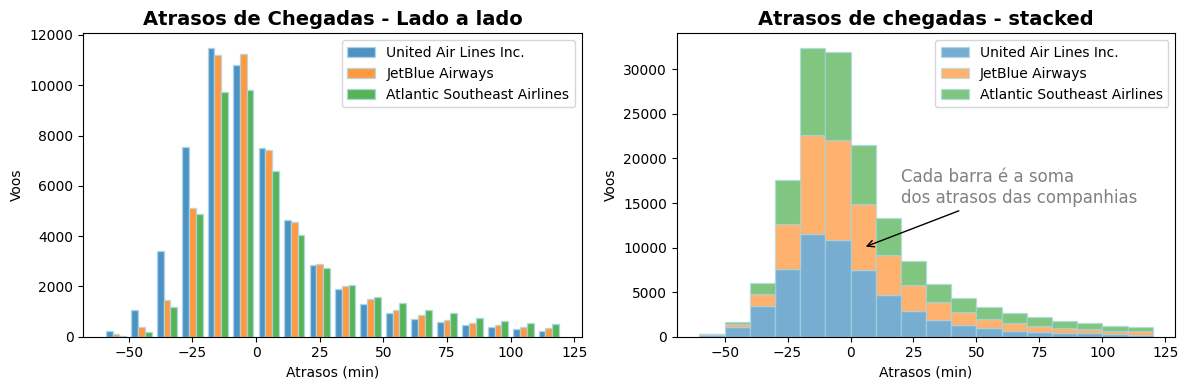

In [14]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) #evita msg de warning para listas com tamanhos diferentes
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
list_hist = []

for companhia in top3:
  list_hist.append(flights[flights.name == companhia]['arr_delay'])

plt.hist(list_hist, bins=int(interval/binwidth), edgecolor='lightblue', alpha=0.8, label=top3)

plt.title('Atrasos de Chegadas - Lado a lado', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Voos')
plt.legend()

plt.subplot(1,2,2)
plt.hist(list_hist, bins=int(interval/binwidth), edgecolor='lightblue', alpha=0.6, label=top3, stacked=True)

plt.annotate('Cada barra é a soma\ndos atrasos das companhias', xy=(5,10000), xytext=(20,15000),arrowprops=dict(arrowstyle="->"),fontsize=12,color='grey')
plt.title('Atrasos de chegadas - stacked', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Voos')
plt.legend()

plt.tight_layout()
plt.show()

<ipython-input-15-4f2aa9c45258>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=flights[flights.name == low3[0]], x='arr_delay', hue='name', shade=True, ax=axs[1])


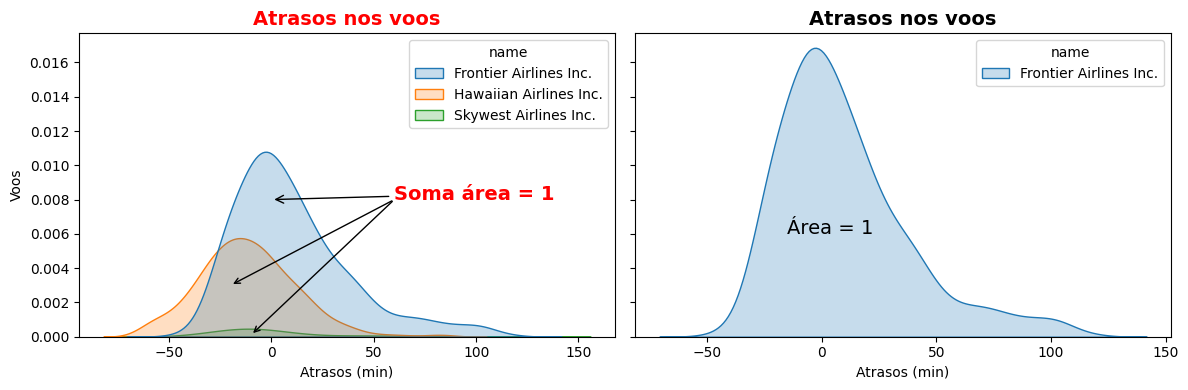

In [15]:
f, axs= plt.subplots(1,2,figsize=(12,4),sharey=True)

sns.kdeplot(data=flights[flights.name.isin(low3)], x='arr_delay', hue='name', fill=True, ax=axs[0]) #fill instead of shade
axs[0].set_title('Atrasos nos voos', fontsize=14, weight='bold', color='r')
axs[0].set_xlabel('Atrasos (min)')
axs[0].set_ylabel('Voos')

sns.kdeplot(data=flights[flights.name == low3[0]], x='arr_delay', hue='name', shade=True, ax=axs[1])
axs[1].set_title('Atrasos nos voos', fontsize=14, weight='bold')
axs[1].set_xlabel('Atrasos (min)')
axs[1].set_ylabel('Voos')

axs[0].annotate ('Soma área = 1', xy=(0, 0.008), xytext=(60, 0.008), arrowprops=dict(arrowstyle="->"), fontsize=14, color='r', weight='bold')
axs[0].annotate ('', xy=(-20, 0.003), xytext=(60, 0.008), arrowprops=dict(arrowstyle="->"))
axs[0].annotate('', xy=(-10, 0.0001), xytext=(60, 0.008), arrowprops=dict(arrowstyle="->"))
axs[1].text(-15, 0.006, 'Área = 1', fontsize=14, color='k')

plt.tight_layout()
plt.show()

In [16]:
gdoor = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/glassdoordata.csv')
gdoor.head()

,jobtitle,gender,age,performance,education,department,seniority,income,bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


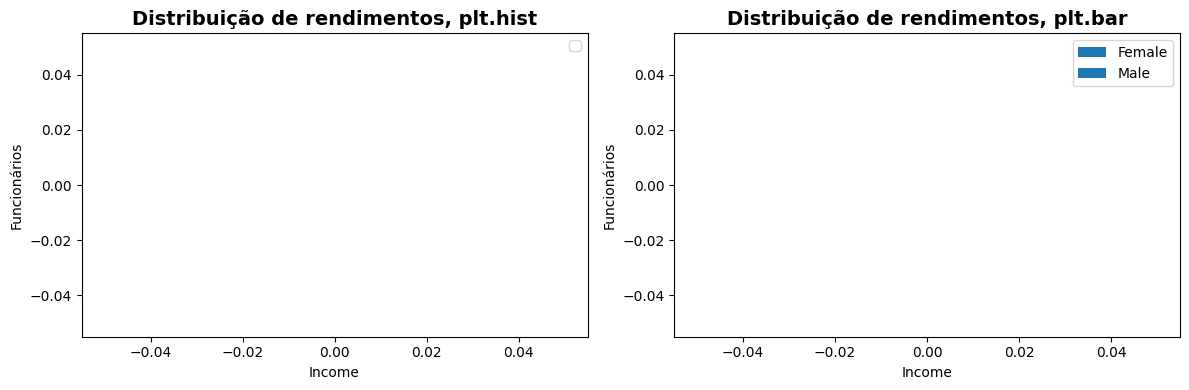

In [17]:
plt.figure(figsize=(12,4))
colors= {'Male':'lightblue', 'Female':'r'}
minin, maxin= gdoor.income.agg({'min', 'max'})

plt.subplot(1,2,1)
for sexo in gdoor.gender.unique():
  plt.hist(gdoor[gdoor.gender == sexo].income, bins=np.arange(minin, maxin, 5000), edgecolor='white', label=sexo, color=colors[sexo], alpha=0.7)

plt.title('Distribuição de rendimentos, plt.hist', fontsize=14, weight='bold')
plt.xlabel('Income')
plt.ylabel('Funcionários')
plt.legend()

plt.subplot(1,2,2)
for sexo in gdoor.gender.unique():
  h= np.histogram(gdoor[gdoor.gender == sexo].income, bins=np.arange(minin, maxin, 5000))
  plt.bar(x=h[1][1:], height=h[0], edgecolor='white', label=sexo, width=5000, color=colors[sexo], alpha=0.7)

plt.title('Distribuição de rendimentos, plt.bar', fontsize=14, weight='bold')
plt.xlabel('Income')
plt.ylabel('Funcionários')
plt.legend()

plt.tight_layout()
plt.show()


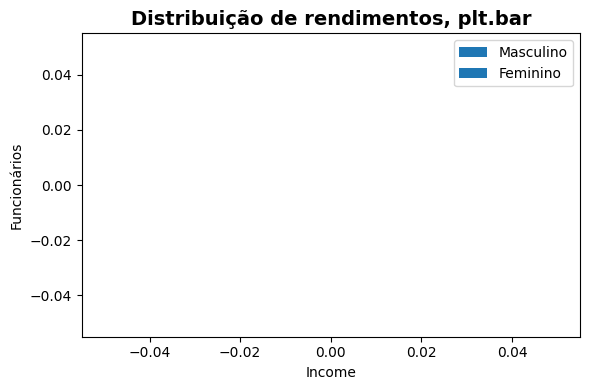

In [18]:
plt.figure(figsize=(6,4))

h= np.histogram(gdoor[gdoor.gender == 'Male'].income, bins=np.arange(minin, maxin, 5000))
plt.bar(x=h[1][1:], height=h[0], edgecolor='white', label='Masculino', width=5000, color=colors['Male'], alpha=0.7)

h= np.histogram(gdoor[gdoor.gender == 'Female'].income, bins=np.arange(minin,maxin,5000))
plt.bar(x=h[1][1::], height= -1 * h[0], edgecolor='white', label='Feminino', width=5000, color=colors['Female'], alpha=0.7)

plt.title('Distribuição de rendimentos, plt.bar', fontsize=14, weight='bold')
plt.xlabel('Income')
plt.ylabel('Funcionários')
plt.legend()

plt.tight_layout()
plt.legend()

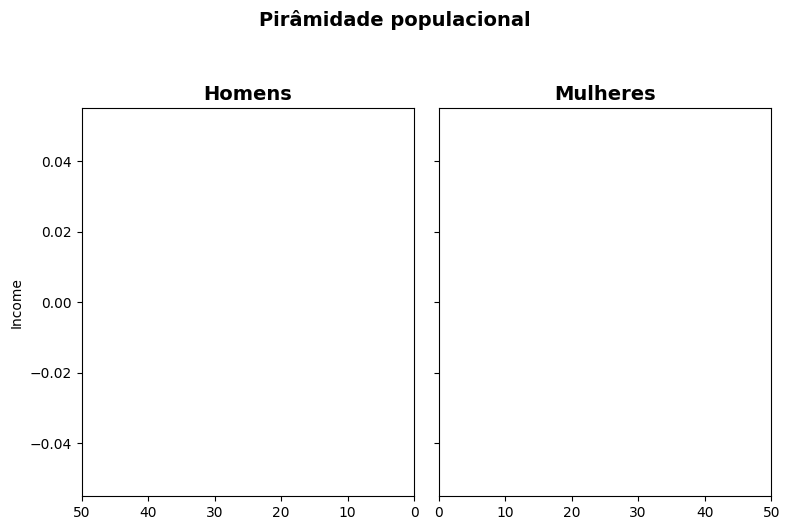

In [19]:
fig, axes= plt.subplots(ncols=2, sharey=True, figsize=(8,5))
fig.suptitle('Pirâmidade populacional', fontsize=14, weight='bold', y=1.05)

h1= np.histogram(gdoor[gdoor.gender == 'Male'].income, bins=np.arange(minin, maxin, 5000))
h2= np.histogram(gdoor[gdoor.gender == 'Female'].income, bins=np.arange(minin, maxin, 5000))

y= h1[1][1:]
x_male = h1[0]
x_female = h2[0]

axes[0].barh(y, x_male, align='center', edgecolor='white', height=5000,color=colors['Male'], alpha=0.8)
axes[0].set_title('Homens', fontsize=14, weight='bold')
axes[1].barh(y, x_female, align='center', edgecolor='white', height=5000, color=colors['Female'], alpha=0.7)
axes[1].set_title('Mulheres', fontsize=14, weight='bold')

axes[0].set_xlim([0,50])
axes[1].set_xlim([0,50])
axes[0].set_ylabel('Income')
axes[0].invert_xaxis()

plt.tight_layout()
plt.show()

*boxplots* -> introduzidos por John Tukey (1970)

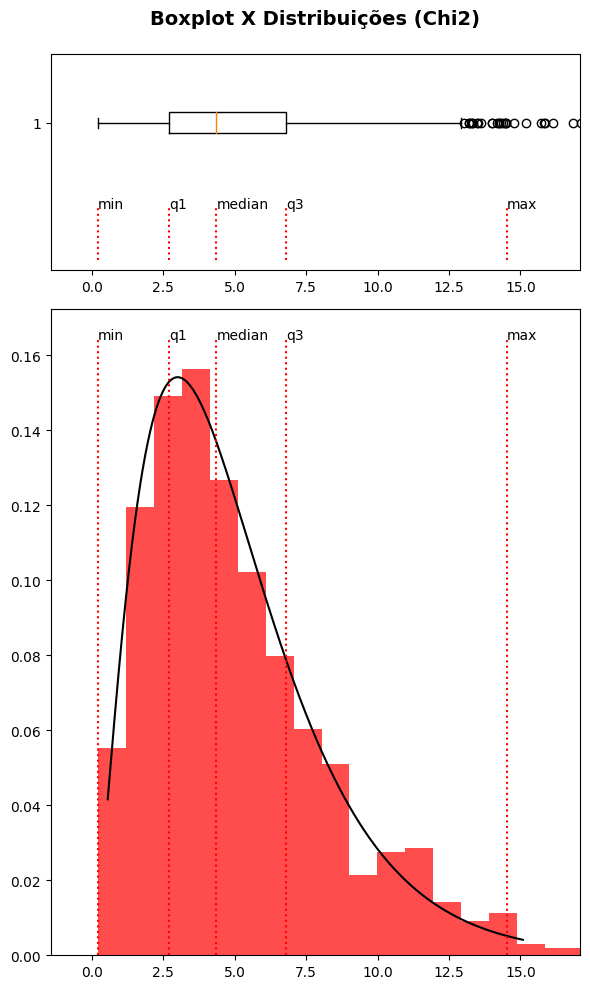

In [20]:
from scipy.stats import chi2, norm
np.random.seed(seed=1)

fig, (ax_box, ax_hist) = plt.subplots(2,  gridspec_kw={"height_ratios": (.25, .75)}, figsize=(6,10))
 
ax_box.set_title('Boxplot X Distribuições (Chi2)\n', fontsize=14, weight='bold') 

# Produzindo dados de uma distribuição chi2
df = 5
rchi2 = chi2.rvs(df, size=1000)
x = np.linspace(chi2.ppf(0.01, df), chi2.ppf(0.99, df), 1000)

ax_box.boxplot(rchi2, vert=False) 
ax_hist.plot(x, chi2.pdf(x, df), 'k-', label='chi2 pdf', lw=1.5)
ax_hist.hist(rchi2, density=True, bins=30, alpha=0.7, color='r')

ax_box.set_xlim([min(x) - 0.4*df, max(x) + 0.4*df])
ax_hist.set_xlim([min(x) - 0.4*df, max(x) + 0.4*df])

max_hist = ax_hist.get_ylim()[1]
max_box = ax_box.get_ylim()[1]

for q, label in zip([0,0.25,0.5,0.75,0.99],['min','q1','median','q3','max']):
  ax_hist.vlines(np.quantile(rchi2,q),0,max_hist,color='r',linestyles='dotted',lw=1.5)
  ax_box.vlines(np.quantile(rchi2,q),0,max_box/4,color='r',linestyles='dotted',lw=1.5)
  ax_hist.text(np.quantile(rchi2,q),max_hist,label)
  ax_box.text(np.quantile(rchi2,q),max_box/4,label)

plt.tight_layout()
plt.show()

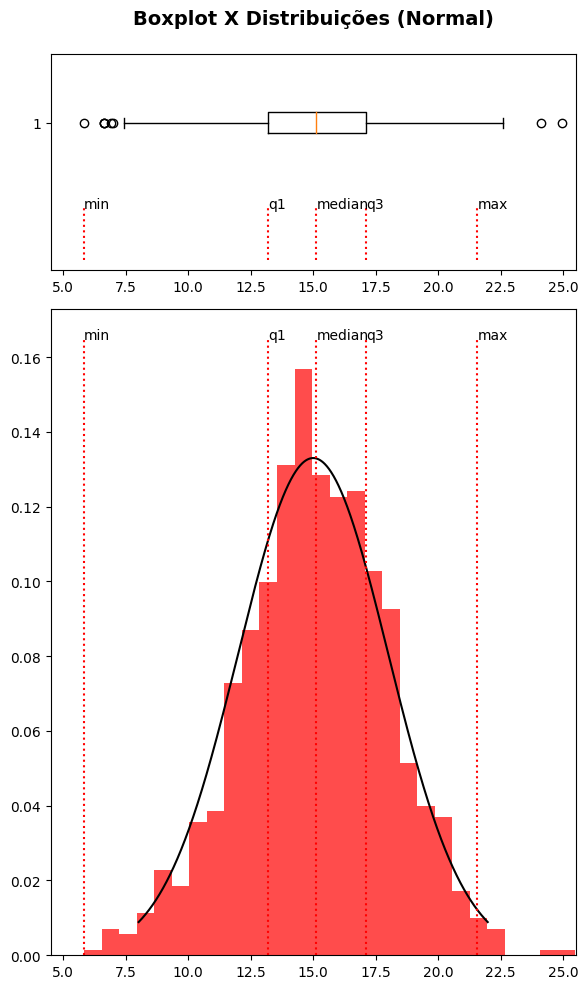

In [21]:
from scipy.stats import chi2, norm
np.random.seed(seed=1)

fig, (ax_box, ax_hist) = plt.subplots(2,  gridspec_kw={"height_ratios": (.25, .75)}, figsize=(6,10))
 
ax_box.set_title('Boxplot X Distribuições (Normal)\n', fontsize=14, weight='bold') 

# Produzindo dados de uma distribuição normal
media = 15
sd = 3
rnorm = norm.rvs(loc=media,scale=sd,size=1000)
x = np.linspace(norm.ppf(0.01,loc=media,scale=sd), norm.ppf(0.99,loc=media,scale=sd), 1000)

ax_box.boxplot(rnorm, vert=False) 
ax_hist.plot(x, norm.pdf(x,loc=media,scale=sd), 'k-', label='normal', lw=1.5)
ax_hist.hist(rnorm, density=True, bins=30,  alpha=0.7, color='r')

ax_box.set_xlim([media - 3.5*sd, media + 3.5*sd])
ax_hist.set_xlim([media - 3.5*sd, media + 3.5*sd])

max_hist = ax_hist.get_ylim()[1]
max_box = ax_box.get_ylim()[1]

for q, label in zip([0,0.25,0.5,0.75,0.99],['min','q1','median','q3','max']):
  ax_hist.vlines(np.quantile(rnorm,q),0,max_hist,color='r',linestyles='dotted',lw=1.5)
  ax_box.vlines(np.quantile(rnorm,q),0,max_box/4,color='r',linestyles='dotted',lw=1.5)
  ax_hist.text(np.quantile(rnorm,q),max_hist,label)
  ax_box.text(np.quantile(rnorm,q),max_box/4,label)

plt.tight_layout()
plt.show()
     

ValueError: ignored

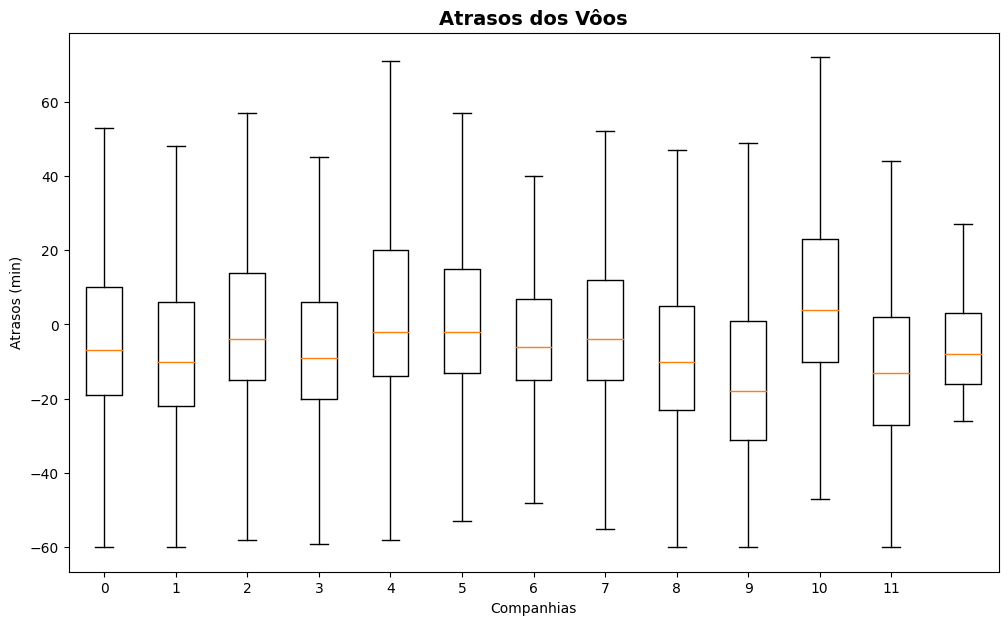

In [23]:

plt.figure(figsize=(12,7))

for i, companhia in enumerate(flights.name.unique()):
  plt.boxplot(flights[ flights.name == companhia ]['arr_delay'],positions=[i], showfliers=False, widths=0.5)

plt.title('Atrasos dos Vôos', fontsize=14, weight='bold')  
plt.ylabel('Atrasos (min)') 
plt.xlabel('Companhias')

plt.xticks(ticks=range(0,12),labels=flights.name.unique(),rotation=60)
plt.show()

ValueError: ignored

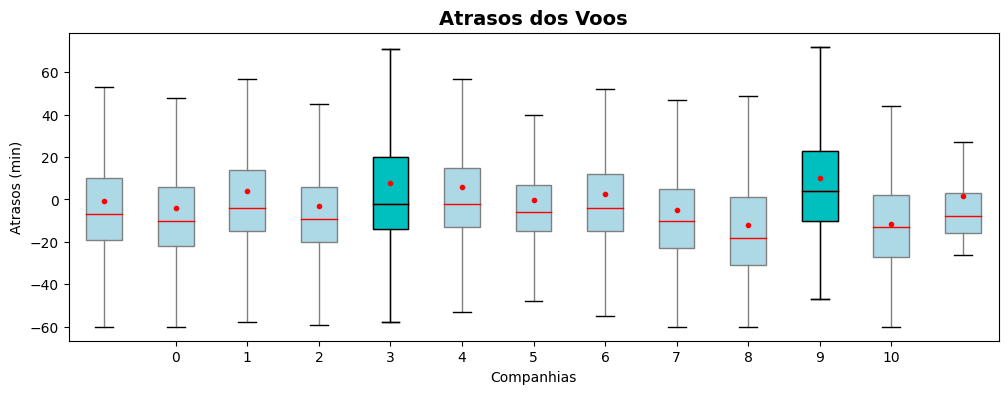

In [24]:
plt.figure(figsize=(12,4))

for i, companhia in enumerate(flights.name.unique()):
  plt.boxplot(flights[flights.name == companhia]['arr_delay'],positions=[i],showfliers=False,widths=0.5,patch_artist=True,boxprops=dict(facecolor='lightblue',color='grey'),medianprops=dict(color='r'),capprops=dict(color='k'),whiskerprops=dict(color="grey"),showmeans=True,meanprops={"marker":"o", "markerfacecolor":"r", "markeredgecolor":"r", "markersize":"3"})

plt.boxplot(flights[flights.name == 'Atlantic Southeast Airlines']['arr_delay'],positions=[4],showfliers=False, widths=0.5, patch_artist=True, boxprops=dict(facecolor="c", color="k"), medianprops=dict(color="k"), capprops=dict(color="k"), whiskerprops=dict(color="k"))
plt.boxplot(flights[flights.name == 'Frontier Airlines Inc.']['arr_delay'],positions=[10],showfliers=False, widths=0.5, patch_artist=True, boxprops=dict(facecolor="c", color="k"), medianprops=dict(color="k"), capprops=dict(color="k"), whiskerprops=dict(color="k"))

plt.title('Atrasos dos Voos', fontsize=14, weight='bold')
plt.ylabel('Atrasos (min)')
plt.xlabel('Companhias')

plt.xticks(ticks = range(1,12),labels=flights.name.unique(),rotation=60)
plt.show()

In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/sp500_ibov_2000.csv')


In [26]:
df = df[df.Date > '2017-01-01']

In [27]:
df.head()

,Date,SP500,IBOV,YYYY-MM
4384,2017-01-02,NaN,59589.0,2017-01
4385,2017-01-03,2257.830078,61814.0,2017-01
4386,2017-01-04,2270.750000,61589.0,2017-01
4387,2017-01-05,2269.000000,62071.0,2017-01
4388,2017-01-06,2276.979980,61665.0,2017-01


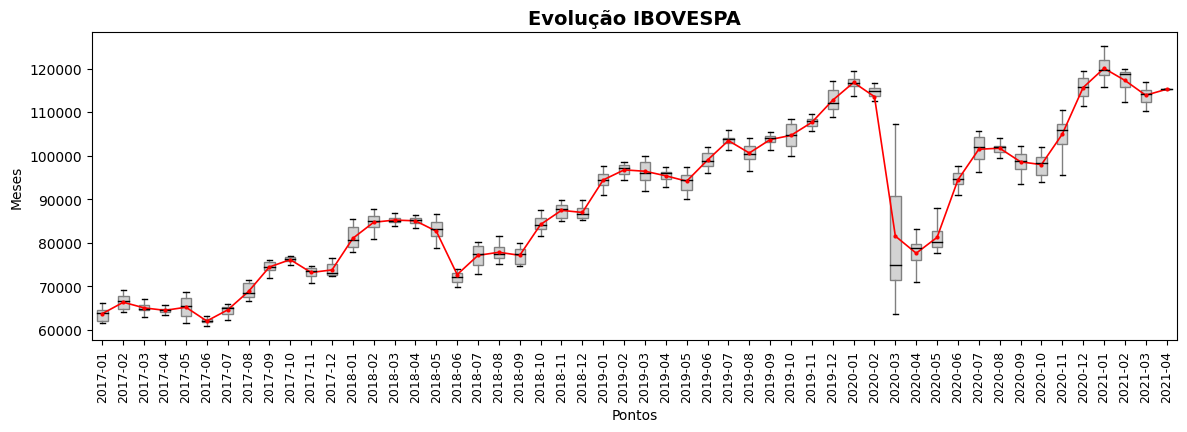

In [28]:
df.dropna(inplace=True) #remove dados nulos NA do dataset
plt.figure(figsize=(14,4))

for i, yd in enumerate(df['YYYY-MM'].unique()):
  plt.boxplot(df[df['YYYY-MM'] == yd]['IBOV'],positions=[i],widths=0.5, showfliers=False, patch_artist=True, boxprops=dict(facecolor='lightgrey', color='grey'),
              medianprops=dict(color="k"), capprops=dict(color="k"), whiskerprops=dict(color="grey"), showmeans=True, 
              meanprops={"marker":"o", "markerfacecolor":"r", "markeredgecolor":"r", "markersize":"2"})
  
plt.plot(range(0,len(df['YYYY-MM'].unique())), df.groupby('YYYY-MM').IBOV.mean(), color='red', lw=1.2)

plt.title('Evolução IBOVESPA', fontsize=14, weight='bold')
plt.ylabel('Meses')
plt.xlabel('Pontos')

plt.xticks(ticks=range(0,len(df['YYYY-MM'].unique())), labels=df['YYYY-MM'].unique(),rotation=90,fontsize=9)
plt.show()

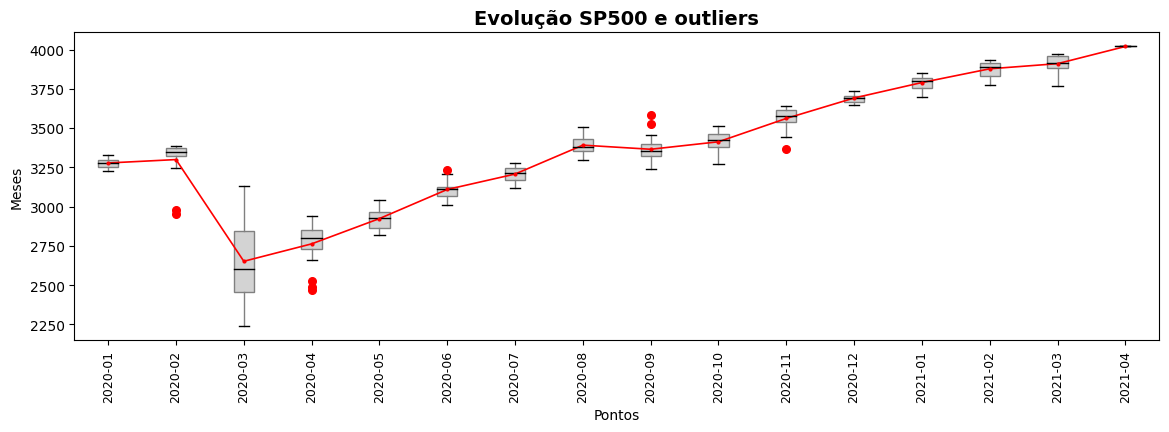

In [34]:
plt.figure(figsize=(14,4))
df= df[df.Date > '2020-01-01']

for i, yd in enumerate(df['YYYY-MM'].unique()):
  plt.boxplot(df[df['YYYY-MM'] == yd]['SP500'],positions=[i],widths=0.3,showfliers=True,patch_artist=True,boxprops=dict(facecolor='lightgrey', color='grey'),
                                                                                                                        medianprops=dict(color='k'), capprops=dict(color='k'),
                                                                                                                        whiskerprops=dict(color='grey'), showmeans=True,
                                                                                                                        meanprops={'marker':'o', 'markerfacecolor':'r', 
                                                                                                                                   'markeredgecolor':'r', 'markersize':'2'},
                                                                                                                        flierprops=dict(markeredgecolor='r', markerfacecolor='r', markersize=5.5))

plt.plot(range(0, len(df['YYYY-MM'].unique())), df.groupby('YYYY-MM').SP500.mean(), color='red', lw=1.2)

plt.title('Evolução SP500 e outliers', fontsize=14, weight='bold')
plt.ylabel('Meses')
plt.xlabel('Pontos')

plt.xticks(ticks=range(0,len(df['YYYY-MM'].unique())),labels=df['YYYY-MM'].unique(),rotation=90,fontsize=9)
plt.show()


**interquartil range =
iqr=Q3-Q1 -> outliers**

In [38]:
#plt.hist2d(flights['arr_delay'],flights['name'].unique())

In [39]:
bandas={('Nirvana','Pearl Jam','Alice in Chains','Soundgarden'),('Kurt','Eddie','Layne','Chris')}

In [48]:
type(bandas)

set

In [62]:
grunge=pd.Series(['Nirvana','Pearl Jam','Alice in Chains','Soundgarden'])
singer=pd.Series(['Kurt','Eddie','Layne','Chris'])

bands= pd.DataFrame({'bandas':grunge,'frontman':singer})
bands
bands.loc[0:1]

,bandas,frontman
0,Nirvana,Kurt
1,Pearl Jam,Eddie


In [2]:
WHO = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/Life_Expectancy_Data.csv')
WHO.rename(columns={' BMI ':'BMI', 'Life expectancy ':'Life_expectancy'}, inplace=True)
WHO = WHO[ WHO.Year == 2015 ][['Country', 'Year', 'Status', 'Life_expectancy', 'BMI', 
                              'under-five deaths ', 'GDP', 'Population',
                              'Income composition of resources', 'Schooling']]
WHO.dropna(inplace=True)
WHO.head()


,Country,Year,Status,Life_expectancy,BMI,under-five deaths,GDP,Population,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,19.1,83,584.259210,33736494.0,0.479,10.1
16,Albania,2015,Developing,77.8,58.0,0,3954.227830,28873.0,0.762,14.2
32,Algeria,2015,Developing,75.6,59.5,24,4132.762920,39871528.0,0.743,14.4
48,Angola,2015,Developing,52.4,23.3,98,3695.793748,2785935.0,0.531,11.4
80,Argentina,2015,Developing,76.3,62.8,9,13467.123600,43417765.0,0.826,17.3


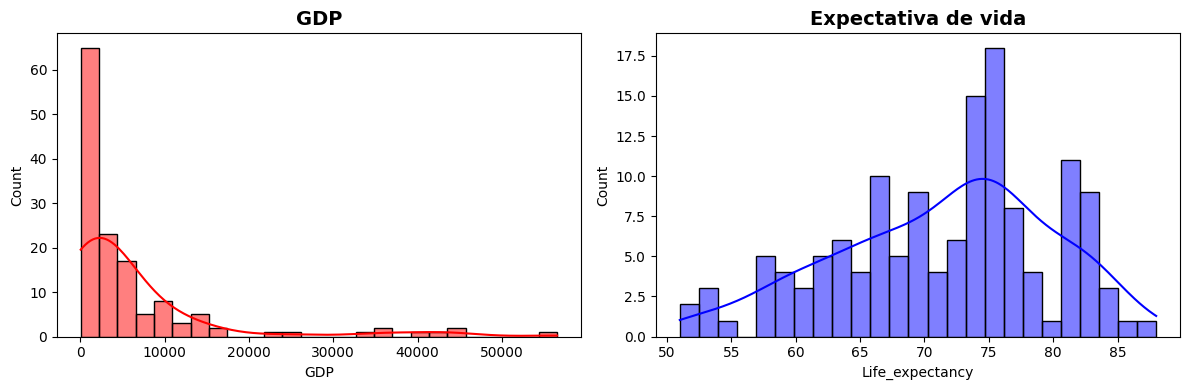

In [4]:
fig, axs= plt.subplots(1,2, figsize=(12,4))
sns.histplot(data=WHO, x='GDP', kde=True, color='red', ax=axs[0])
axs[0].set_title('GDP', fontsize=14, weight='bold')

sns.histplot(data=WHO, x='Life_expectancy', kde=True, color='blue', ax=axs[1], bins=25)
axs[1].set_title('Expectativa de vida', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

<ipython-input-7-e83df11561df>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=WHO, x='GDP', y="Life_expectancy",shade=True, color='red', ax=axs[1], cbar=True)


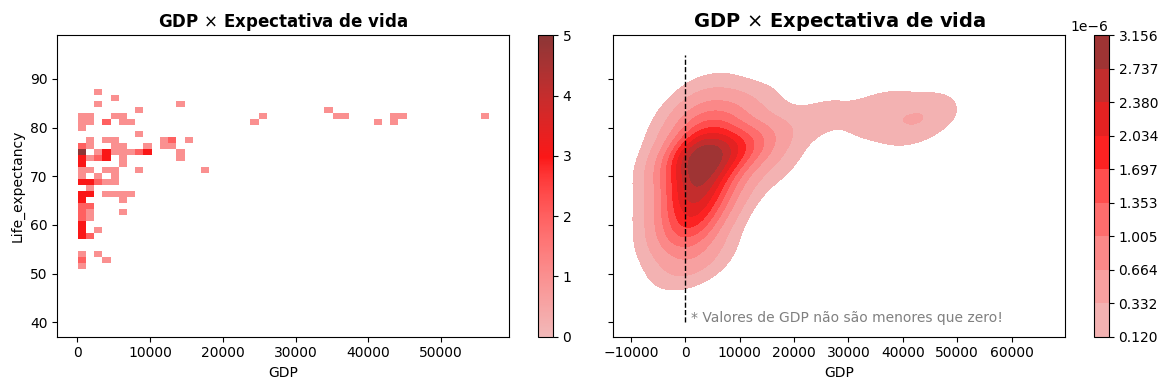

In [7]:
fig, axs= plt.subplots(1, 2, figsize=(12,4), sharey=True)

sns.histplot(data=WHO, x='GDP', y='Life_expectancy', color='red', bins=(50,30), ax=axs[0], cbar=True)
axs[0].set_title('GDP $\\times$ Expectativa de vida', fontsize=12, weight='bold') #$\\times$ símbolo de X

sns.kdeplot(data=WHO, x='GDP', y="Life_expectancy",shade=True, color='red', ax=axs[1], cbar=True)
axs[1].set_title('GDP $\\times$ Expectativa de vida', fontsize=14, weight='bold')

axs[1].vlines(0,40,95,color='k',linestyle='dashed',lw=1)
axs[1].text(1000,40,'* Valores de GDP não são menores que zero!',color='grey')

plt.tight_layout()
plt.show()

In [15]:
#print('GDP $\\times$ Expectativa de vida') não funciona

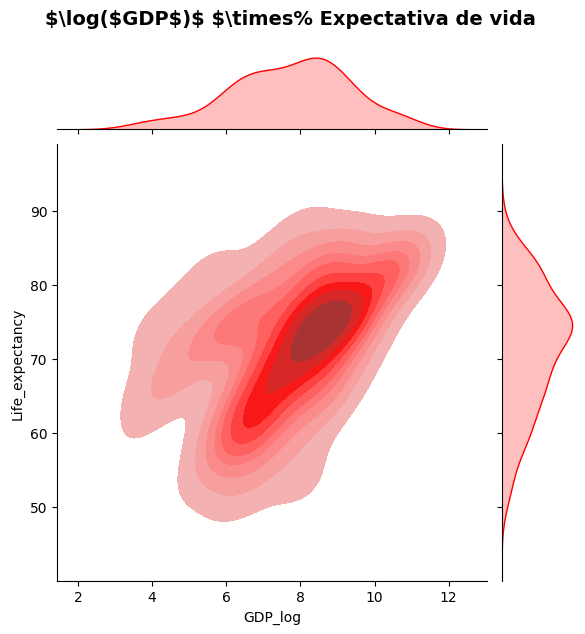

In [17]:
WHO['GDP_log'] = np.log(WHO.GDP)

sns.jointplot(data=WHO, x='GDP_log', y='Life_expectancy',kind='kde',fill=True,levels=10,color='red')

plt.suptitle('$\log($GDP$)$ $\\times% Expectativa de vida', fontsize=14, weight='bold', y=1.05)
plt.show()

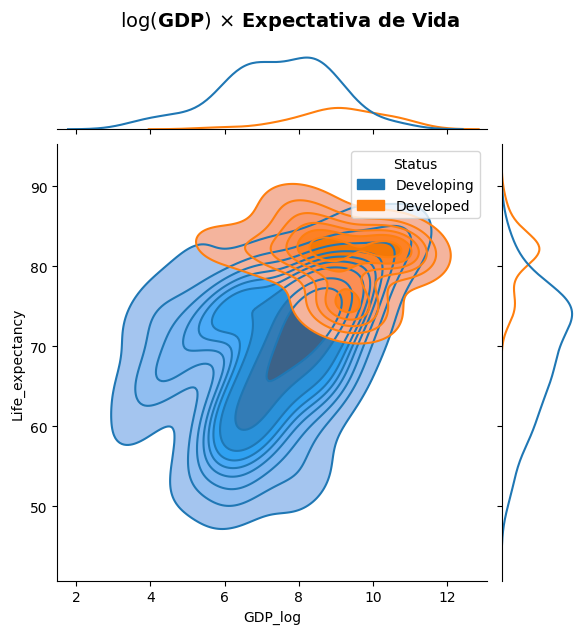

In [18]:
WHO['GDP_log'] = np.log(WHO.GDP)

g= sns.jointplot(data=WHO, x='GDP_log', y='Life_expectancy', hue='Status', kind='kde')
g.plot_joint(sns.kdeplot, fill=True)

plt.suptitle('$\log($GDP$)$ $\\times$ Expectativa de Vida', fontsize=14, weight='bold', y=1.05)
plt.show()